In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import math
import os

folder = "data"
filename = "data.csv"
path = os.path.join(folder, filename)

data = pd.read_csv(path, encoding="latin1")
print(data.head())



   iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

    ...    attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  \
0   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
1   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
2   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
3   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   
4   ...        5.0      7.0       7.0     7.0     7.0      NaN      NaN   

   intel5_3  fun5_3  amb5_3  
0       NaN     NaN     NaN  
1       NaN     NaN     NaN  
2 

In [5]:
# Question 1
file_corr_match = os.path.join(folder, "corr_vs_matches.csv")

file_pairwise_corr_match = lambda att1, att2: os.path.join(folder, "corr_{}_{}_matches.csv".format(att1, att2))

In [6]:
# Utils
def isnan(values):
    return np.isnan(values)

def save_tensor(tensor, filename):
    np.savetxt(filename, tensor, delimiter=",")

[0, 2, 0, 2, 12, 26, 38, 50, 84, 118, 128, 158, 132, 174, 140, 136, 96, 50, 4, 0]
[0, 2, 2, 18, 68, 161, 280, 367, 562, 692, 826, 1067, 820, 1065, 804, 736, 470, 222, 56, 2]


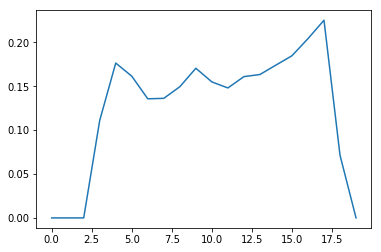

In [7]:
correlation_versus_matches = []
bins = 20
class_size = 2.0/bins
nb_match_per_class = [0]*bins
total_meeting_per_class = [0]*bins

for index, row in data.iterrows():
    if not isnan(row.int_corr):
        if row.match != 0:
            nb_match_per_class[int((row.int_corr+1)/class_size)] += 1
        total_meeting_per_class[int((row.int_corr+1)/class_size)] += 1
        
for index, match_per_class in enumerate(nb_match_per_class):
    
    if(total_meeting_per_class[index])==0:
        correlation_versus_matches.append(0)
    else:
        correlation_versus_matches.append(match_per_class/total_meeting_per_class[index])
# removing an outlier
correlation_versus_matches[1] = 0
print(nb_match_per_class)
print(total_meeting_per_class)

#save_tensor(correlation_versus_matches, file_corr_match)
#plt.hist(correlation_versus_matches,bins=bins,range=(-1.0,1.0))
plt.plot(correlation_versus_matches)

In [9]:
# Good format seems to be (attr_0, attr_1, value) -> http://bl.ocks.org/tjdecke/5558084

def compute_correlation_matrix(n_attr1, n_attr2):
    symmetric = (n_attr1 == n_attr2)
    total_attr1 = dict()
    corr_m = dict()
    
    for index, row in data.iterrows():
        if isnan(row.pid):
            break
        if row.match != 0: 
            person_1 = row
            person_2 = data.query("iid == " + str(row.pid)).iloc[0]
            if not (isnan(person_1[n_attr1]) or isnan(person_2[n_attr2])):
                def append_to_dic(att_1, att_2):               
                    person_1_attr_1 = person_1[att_1]                
                    person_2_attr_2 = person_2[att_2]

                    if person_1_attr_1 not in corr_m:
                        corr_m[person_1_attr_1] = {}
                    try:
                        corr_m[person_1_attr_1][person_2_attr_2] += 1
                    except:
                        corr_m[person_1_attr_1][person_2_attr_2] = 1
                    
                    if person_1_attr_1 not in total_attr1:
                        total_attr1[person_1_attr_1] = 0
                    total_attr1[person_1_attr_1] += 1

                append_to_dic(n_attr1, n_attr2)
        #    append_to_dic(n_attr2, n_attr1)
    for idx, att1 in enumerate(corr_m.keys()):
        for att2 in corr_m[att1]:
            corr_m[att1][att2] = corr_m[att1][att2]*100/total_attr1[att1]
    print(total_attr1)
    print(corr_m)
    save_tensor([(att1, att2, val) for att1 in corr_m.keys() for att2, val in corr_m[att1].items()], 
                file_pairwise_corr_match(n_attr1, n_attr2))
                
compute_correlation_matrix("race", "race")
compute_correlation_matrix("age", "age")
compute_correlation_matrix("field_cd", "field_cd")
#compute_correlation_matrix("age", "field_cd")



{1.0: 21, 2.0: 178, 3.0: 28, 4.0: 43, 6.0: 36}
{1.0: {1.0: 19.047619047619047, 2.0: 52.38095238095238, 3.0: 9.523809523809524, 4.0: 9.523809523809524, 6.0: 9.523809523809524}, 2.0: {1.0: 5.617977528089888, 2.0: 66.29213483146067, 3.0: 5.056179775280899, 4.0: 14.044943820224718, 6.0: 8.98876404494382}, 3.0: {1.0: 7.142857142857143, 2.0: 53.57142857142857, 3.0: 7.142857142857143, 4.0: 14.285714285714286, 6.0: 17.857142857142858}, 4.0: {1.0: 4.651162790697675, 2.0: 58.13953488372093, 3.0: 4.651162790697675, 4.0: 18.6046511627907, 6.0: 13.953488372093023}, 6.0: {1.0: 5.555555555555555, 2.0: 58.333333333333336, 3.0: 13.88888888888889, 4.0: 16.666666666666668, 6.0: 5.555555555555555}}
{32.0: 3, 34.0: 5, 35.0: 2, 39.0: 2, 19.0: 4, 20.0: 10, 21.0: 35, 22.0: 35, 23.0: 29, 24.0: 23, 25.0: 51, 26.0: 25, 27.0: 20, 28.0: 36, 29.0: 18, 30.0: 5}
{32.0: {24.0: 33.333333333333336, 25.0: 33.333333333333336, 27.0: 33.333333333333336}, 34.0: {25.0: 40.0, 28.0: 40.0, 21.0: 20.0}, 35.0: {28.0: 50.0, 21.0: 5

In [14]:
# Question 3
# Good format seems to be (attribute, mean_score) -> http://bl.ocks.org/nbremer/6506614

# Attentes des hommes
class Radar:
    def __init__(self, name):
        self.__name__ = name
        self.dic = {"attractive" : 0, "sincerity" : 0,
                    "intelligence" : 0, "fun" : 0,
                    "ambitious" : 0, "same_interests" : 0}
        self.nb_persons  = 0
        
    def add_person(self, person, exp, time):
        saved_dic = self.dic
        try:
            self.dic["attractive"] += int(person["attr{}_{}".format(exp, time)])
            self.dic["sincerity"] += int(person["sinc{}_{}".format(exp, time)])
            self.dic["intelligence"] += int(person["intel{}_{}".format(exp, time)])
            self.dic["fun"] += int(person["fun{}_{}".format(exp, time)])
            self.dic["ambitious"] += int(person["amb{}_{}".format(exp, time)])
            self.dic["same_interests"] += int(person["shar{}_{}".format(exp, time)])
            self.nb_persons  += 1 
        except:    
            self.dic = saved_dic
    
    def compute_mean(self):
        self.dic = {k: v / self.nb_persons for k, v in self.dic.items()}
        
    def save(self):
        self.compute_mean()
        import json
        with open(os.path.join(folder, "{}.json".format(self.__name__)),'w') as fp:
            json.dump(self.dic, fp)


male_expectation = Radar("male_expectation")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 1:
       male_expectation.add_person(row, 1, 1)
male_expectation.save()

female_expectation = Radar("female_expectation")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 0:
       female_expectation.add_person(row, 1, 1)
female_expectation.save()

male_experience = Radar("male_experience")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 0 and row.match == 1:
       male_experience.add_person(row, 1, 3)
male_experience.save() 

female_experience = Radar("female_experience")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 1 and row.match == 1:
       female_experience.add_person(row, 1, 3)
female_experience.save() 

male_own_opninon = Radar("male_own_opninon")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 0:
       male_own_opninon.add_person(row, 4, 3)
male_own_opninon.save() 

female_own_opninon = Radar("female_own_opninon")
for index, row in data.iterrows():
    if row.wave not in range(6, 10) and row.gender == 1:
       female_own_opninon.add_person(row, 4, 3)
female_own_opninon.save() 

In [3]:
# Question 4
# TODO... faut qu'on se décide
os.path.realpath('.')

'/Users/Raphael/Documents/Poly/Maitrise_S3/Data_Viz/Projet'